# **1. Problem Statement**

### What is Sales Forecasting?
Sales Forecasting is the process of estimating future revenue by predicting the amount of product or services a unit will sell in the defined time duration.

### Why it Matters?


*   Forecasting helps business make better decisions with planning , budgetting, and risk management.

* It helps manage cashflow for future growth.

* It can also help the sales team achieve goals by identifying any early warning signals and correct them before it's too late.

* By Forecasting, businesses can estimate their costs and revenue and can predict their short and long term performance.

## **1.1 Objective**

Provided the Historic Sales Data from **1115** Stores, predicting the future daily sales based on the features 

## **1.2 Pre Requisite**

We have the dataset of historic sales data of 1115 stores having various features like the number of customers, if any promotion was running that day, holiday information and store feratures.




# **2. Importing Dataset and Libraries**

## **2.1 Importing Libraries**




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## **2.1 Importing the Training Data**


### **2.1.1 Sales Data**
#### ***Understanding the Sales Dataset:***

The Dataset contains **1017209** rows and **9** Columns having **1115** unique Stores.

The **'Sales'** is the **Target** variable, the value which we have to predict.

[Data Source](https://www.kaggle.com/c/rossmann-store-sales/data)

#### ***Columns:*** 
* **Store:** The Unique Store ID, helps identify the store.
* **DayofWeek:** The Day of the Week represented Numerically
* **Date:** The Date for which the Sales are shown.
* **Customers**: Number of customers that visited the store on the Date.
* **Open:** Boolean, to know whether a store was open or closed.1 = Open, 0 = closed.
* **Promo:** Boolean, if store was running a promotion that day or not.1 = Yes, 0 = No.
* **StateHoliday:** Indicates the type of State Holiday.

  *   a : Public Holiday 
  *   b : Easter Holiday
  *   c : Christmas
  *   0 : None


* **SchoolHoliday:** Boolean, if it was a state holiday that day or not.1 = Yes, 0 = No.


In [ ]:
# Reading the Training Data File
sales_train_df = pd.read_csv("/dataset/train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(f"No of Rows in the Dataset: {len(sales_train_df)}\n")
sales_train_df.head()

No of Rows in the Dataset: 1017209



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


#### **2.1.1.a Sales Data Observations:**



*   The **Max Sales** That took place on a day was for **41551 Euros** and the **minimum** was **0**, on an **average** the daily sales are **5773** Euros.
*   The **Max Customers** on a Day was **7388**, the **minimum** again here was **0**.
The **average** customers per day are **633**.
*   The Majority values for both Sales Amount and Number of Customers lie within the **75% Range**.




In [ ]:
# Exploring the Days the Sale was 41551

sales_train_df[sales_train_df['Sales']>40000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
44393,909,1,2015-06-22,41551,1721,1,0,0,0


In [ ]:
# Exploring the Days the Customers were 7388

sales_train_df[sales_train_df['Customers']>7300]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


### **2.1.2 Store Information Data**
#### ***Understanding the Sales Dataset:***

The Store Information Dataset describes the 1115 unique Stores.
We do have certain values which are missing for certain columns.
It contains 1115 rows, for each store and has 10 features(columns)

[Data Source](https://www.kaggle.com/c/rossmann-store-sales/data)

#### ***Columns:*** 
* **Store:** The Unique Store ID, helps identify the store.

* **StoreType:** Categorical Variable, indicating the type of store as a,b,c,d.

* **Assortment:** Categorical Variable, indicating the type of store as a,b,c,d.

* **CompetitionDistance:** In Meters, distance to the closest competitor store.

* **CompetitionOpenSinceMonth:** Estimated Month in which competitor's store opened.

* **CompetitionOpenSinceYear:** Estimated Year in which competitor's store opened.

* **Promo2:** Boolean, is a consecutive promotion for some stores. 
  *   0 : Store is Participating 
  *   1 : Store is not Participating 

* **Promo2SinceWeek:** Week in Number when store started participating in promo 2.

* **Promo2SinceYear:** Year in which store started participating in promo 2.

					

* **PromoInterval:** Indicates the consecutive intervals in which promo2 is started as new. in the first case Jan, Arp,Jul,Oct means each round of promo2 starts in jan, april , july and october of any given year for that store. 



In [ ]:
store_info_df = pd.read_csv("/dataset/store.csv")

In [ ]:
print(f"No of Rows in the Dataset: {len(store_info_df)}\n")
store_info_df.head()

No of Rows in the Dataset: 1115



,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,nan,nan,NaN
4,5,a,a,29910.00,4.00,2015.00,0,nan,nan,NaN


In [ ]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [ ]:
# Checking how  many stores running additional promo
print(f"Stores Running Promo 2: {len(store_info_df[store_info_df['Promo2']==1])}\n")


Stores Running Promo 2: 571



#### **2.1.2.a Store Data Observations:**




*   **75**% of the stores are within **7 Km** Radius of the stores. with the mean distance being **5.4 Kms**

*   from the provided dataset, **761** stores are having a competitor store near them with majority stores have been opened within **2013**.

*   **571** of the total stores have been running a secondary promotion. which was started in **2009** as that is the minimum value in the dataset.






# **Checkpoint 1**

In [ ]:
sales_train_df_1 = sales_train_df.copy()
store_info_df_1 = store_info_df.copy()

# **3. Exploratory Data Analysis**

## **3.1 Exploring Sales Data**

### 3.1.1 Checking for Null Values

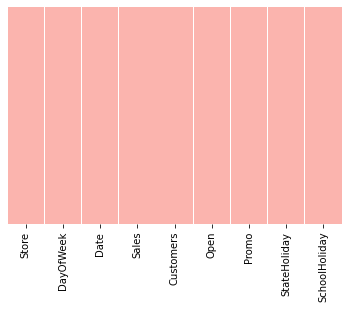

In [ ]:
# Checking for Null Values within the Dataset

sns.heatmap(sales_train_df.isnull(), yticklabels = False, cbar=False, cmap='Pastel1')
plt.show()

### 3.1.2 Histogram for All Features

**Observations:**


1.   We have equally distributed data from all stores, we dont have to worry about an imbalance here.

1.   The Distribution of **Days of The Week** is very similiar to that of an **Equal Distribution**. each day having close to 150000 observations.

1.   The **Average Sales** are highy concentrated below **8000**, the distribution of sales is **right skewed**. 

1.   The **Customers Data** is also Right Skewed, the **average** number of customers per day is around **600-700**.
ther graph looks discontinuous after 6000, which might indicate that one entry of **7388** customers might be an **outlier**.

1.   There are currently  **more than 80% open stores** and approximately **40%** of the stores are using some **promotion** at their store.

1.   The Holidays in both cases , **School** and **State holidays**do not account for more than **18%** and **4%** respectively. 




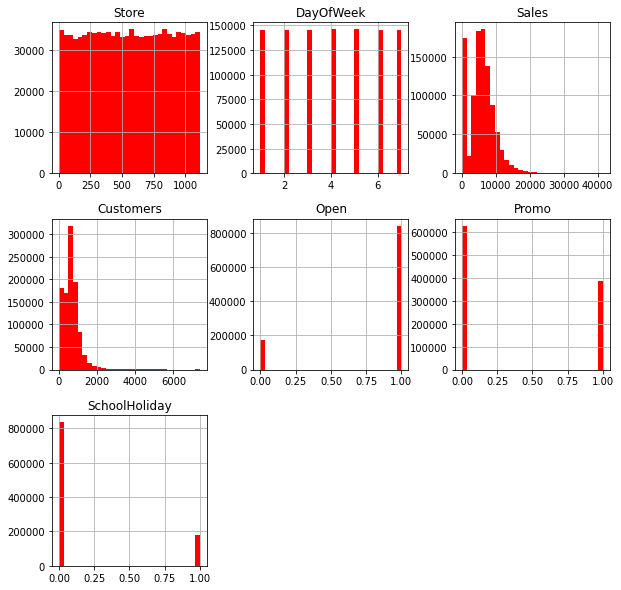

In [ ]:
sales_train_df.hist(bins=30, figsize = (10,10), color = 'r')
plt.show()

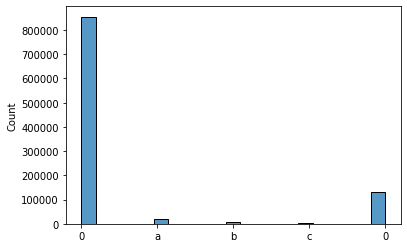

In [ ]:
# Since the state holiday is not produced due to it having categorical value
# Factorising it to convert the categorical values to numeric labels

state_holiday, mapping_index = pd.Series(sales_train_df['StateHoliday']).factorize()

# Plotting Histplot for the categories
sns.histplot(state_holiday,legend=True)
plt.xticks(range(0,len(mapping_index)), mapping_index)
plt.show()

# Note : Reason for 2 0's is due to some 0's being encoded as string '0' which others as plain 0.

### 3.1.3 Dropping all closed Stores from the DataFrame

In [ ]:
sales_train_df = sales_train_df[sales_train_df['Open']==1]

#Dropping the "Open" Column since it contains only open stores
sales_train_df.drop(['Open'], axis=1, inplace=True)

sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


## **3.2 Exploring Stores Data**

### 3.1.1 Checking for Null Values



*   Coimpetition Distance has few missing values.
*   Quite a lot of values missing in CompetitionsOpen since month and year and promosinceweek, year and interval columns


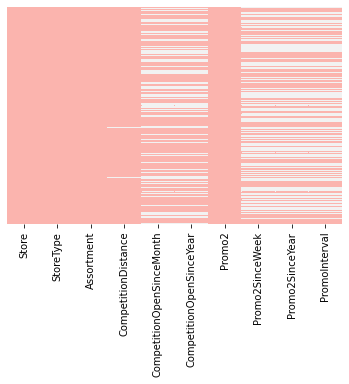

In [ ]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Pastel1')
plt.show()

In [ ]:
# Checking Missing Competition Distance Values

store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,nan,nan,nan,0,nan,nan,NaN
621,622,a,c,nan,nan,nan,0,nan,nan,NaN
878,879,d,a,nan,nan,nan,1,5.00,2013.00,"Feb,May,Aug,Nov"


In [ ]:
# Checking for Missing Values in Competition Open Since Month

store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.00,nan,nan,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
12,13,d,a,310.00,nan,nan,1,45.00,2009.00,"Feb,May,Aug,Nov"
15,16,a,c,3270.00,nan,nan,0,nan,nan,NaN
18,19,a,c,3240.00,nan,nan,1,22.00,2011.00,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.00,nan,nan,1,22.00,2012.00,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.00,nan,nan,1,10.00,2014.00,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.00,nan,nan,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.00,nan,nan,0,nan,nan,NaN
1113,1114,a,c,870.00,nan,nan,0,nan,nan,NaN


In [ ]:
# Checking for Missing Values in Competition Open Since Month


print(f"Total Missing Values CompetitionOpenSinceMonth = {len(store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()])}\n")
print(f"Total Missing Values CompetitionOpenSinceYear = {len(store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()])}\n")

Total Missing Values CompetitionOpenSinceMonth = 354

Total Missing Values CompetitionOpenSinceYear = 354



In [ ]:
# Checking for Promo2 Since Features
# Looks like they are dependent on the Promo2 Feature.

no_promo2_stores = store_info_df[store_info_df['Promo2']==0]


In [ ]:
no_promo2_stores.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,544.00,542.00,396.00,396.00,544.00,0.00,0.00
mean,555.53,6549.52,7.26,2009.12,0.00,nan,nan
std,317.49,9374.32,3.18,4.33,0.00,nan,nan
min,1.00,30.00,1.00,1990.00,0.00,nan,nan
25%,280.25,992.50,4.00,2006.00,0.00,nan,nan
50%,559.00,2640.00,8.00,2010.00,0.00,nan,nan
75%,827.25,8105.00,10.00,2013.00,0.00,nan,nan
max,1114.00,75860.00,12.00,2015.00,0.00,nan,nan


In [ ]:
print(f"Total Stores not using Promo2 = {len(no_promo2_stores)}\n")
print(f"Number of Null Rows for Promo2SinceWeek = {no_promo2_stores['Promo2SinceWeek'].isnull().sum()}\n")
print(f"Number of Null Rows for Promo2SinceYear = {no_promo2_stores['Promo2SinceYear'].isnull().sum()}\n")
print(f"Number of Null Rows for PromoInterval = {no_promo2_stores['PromoInterval'].isnull().sum()}\n")


Total Stores not using Promo2 = 544

Number of Null Rows for Promo2SinceWeek = 544

Number of Null Rows for Promo2SinceYear = 544

Number of Null Rows for PromoInterval = 544



### 3.1.2 Handling Promo2 related missing values

1. From the above tabel we can see that when Promo2 is set to 0, the remaining 3 columns:


*   Promo2SinceWeek
*   Promo2SinceYear
*   PromoInterval

    they are all null, therefore, it would better    to make the values for them as 0.


2.   Also, The CompetitionOpenSinceMonth, CompetitionOpenSinceYear both have equal rows of missing values, 354.

it would be better to replace them with zero too.

3. For the Competition Distance we can set the mean value for the missing columns.




In [ ]:
nan_columns = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'PromoInterval', 
               'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

# Iterate over every column from nan columns and replace nan vals with 0
for col in nan_columns:
  store_info_df[col].fillna(0, inplace=True)

In [ ]:
# Handling Competition Distance Missing Values
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].median(),inplace=True)

In [ ]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1115.00,1115.00,1115.00,1115.00,1115.00,1115.00
mean,558.00,5396.61,4.93,1370.94,0.51,12.08,1030.24
std,322.02,7654.51,4.28,935.47,0.50,15.54,1006.04
min,1.00,20.00,0.00,0.00,0.00,0.00,0.00
25%,279.50,720.00,0.00,0.00,0.00,0.00,0.00
50%,558.00,2325.00,4.00,2006.00,1.00,1.00,2009.00
75%,836.50,6875.00,9.00,2011.00,1.00,22.00,2012.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


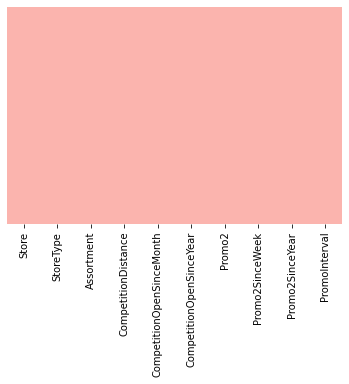

In [ ]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Pastel1')
plt.show()

### 3.1.3 Histogram for All Features

**Observations:**



1.   Majority Stores have their competition within the 3Kms Range.
2.   About half the Stores are using the Promo2 Feature.



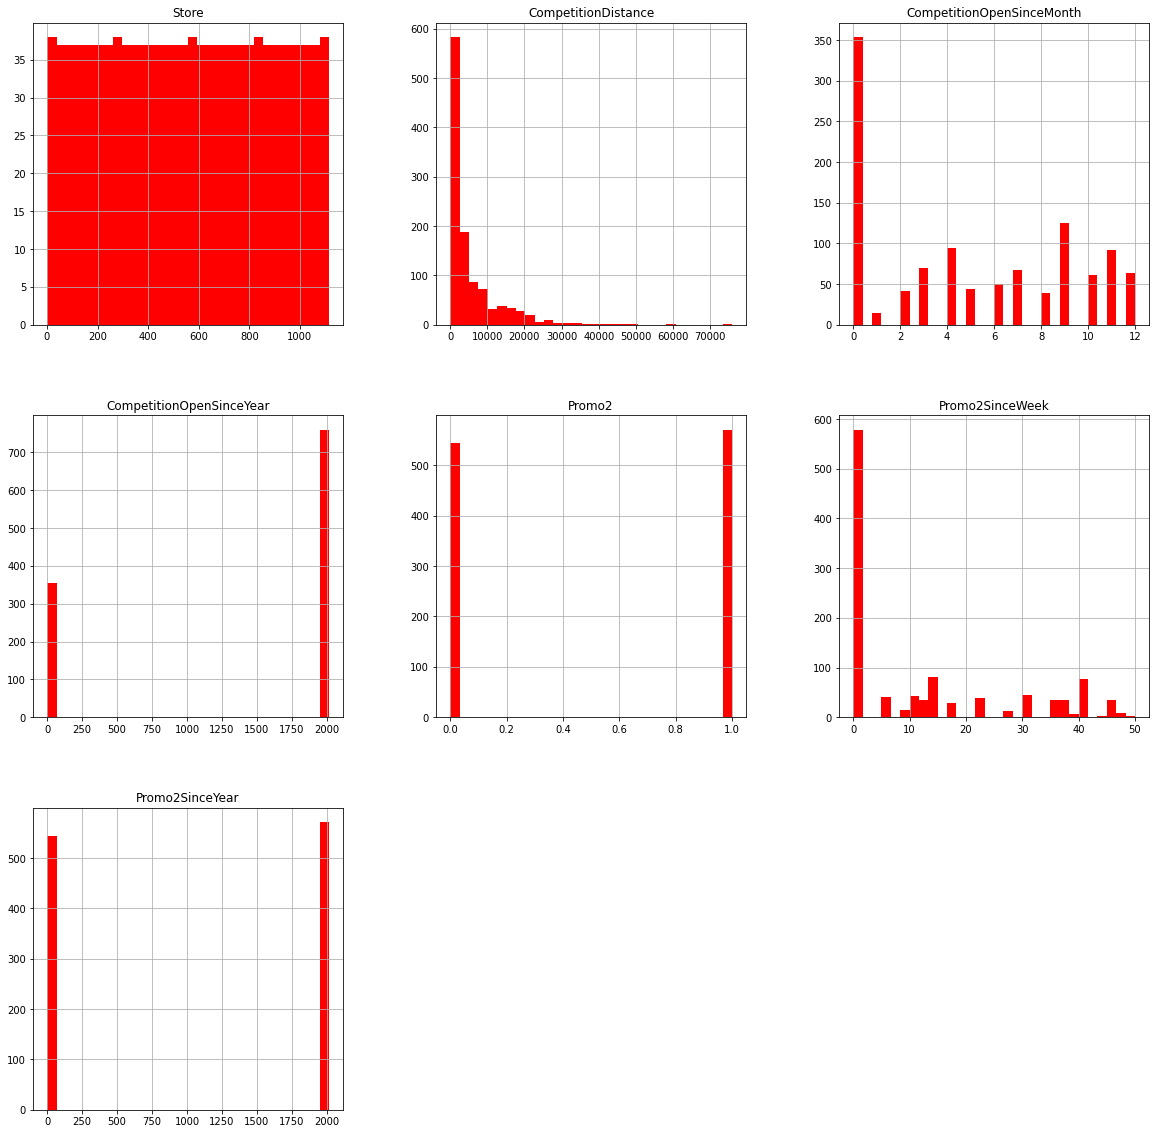

In [ ]:
store_info_df.hist(bins=30, figsize=(20,20), color='r')
plt.show()

# **Checkpoint 2**

In [ ]:
sales_train_df_2 = sales_train_df.copy()
store_info_df_2 = store_info_df.copy()

# **4. Merging both Datasets**

Merging both the sales and store dataset using an inner join on the Store Parameter.

In [ ]:
sales_train_all_df = pd.merge(sales_train_df,store_info_df, how='inner', on='Store')

In [ ]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0


In [ ]:
sales_train_all_df.to_csv('/dataset/merged_sales_train.csv', index=False)

# **5. Data Visualization**

In [ ]:
import pandas as pd
sales_df = pd.read_csv("/dataset/merged_sales_train.csv")

## **5.1 Plotting Correlations for Sales**



1.   The number of **Customers** are positively Co-related.
2.   **Promo 1** Seems to be driving sales more than promo 2, infact Promo2 has a negative corelation.



In [ ]:
correlations = sales_df.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.18
Promo2SinceYear             -0.13
Promo2                      -0.13
Promo2SinceWeek             -0.06
CompetitionDistance         -0.04
CompetitionOpenSinceMonth   -0.02
CompetitionOpenSinceYear     0.01
Store                        0.01
SchoolHoliday                0.04
Promo                        0.37
Customers                    0.82
Sales                        1.00
Name: Sales, dtype: float64

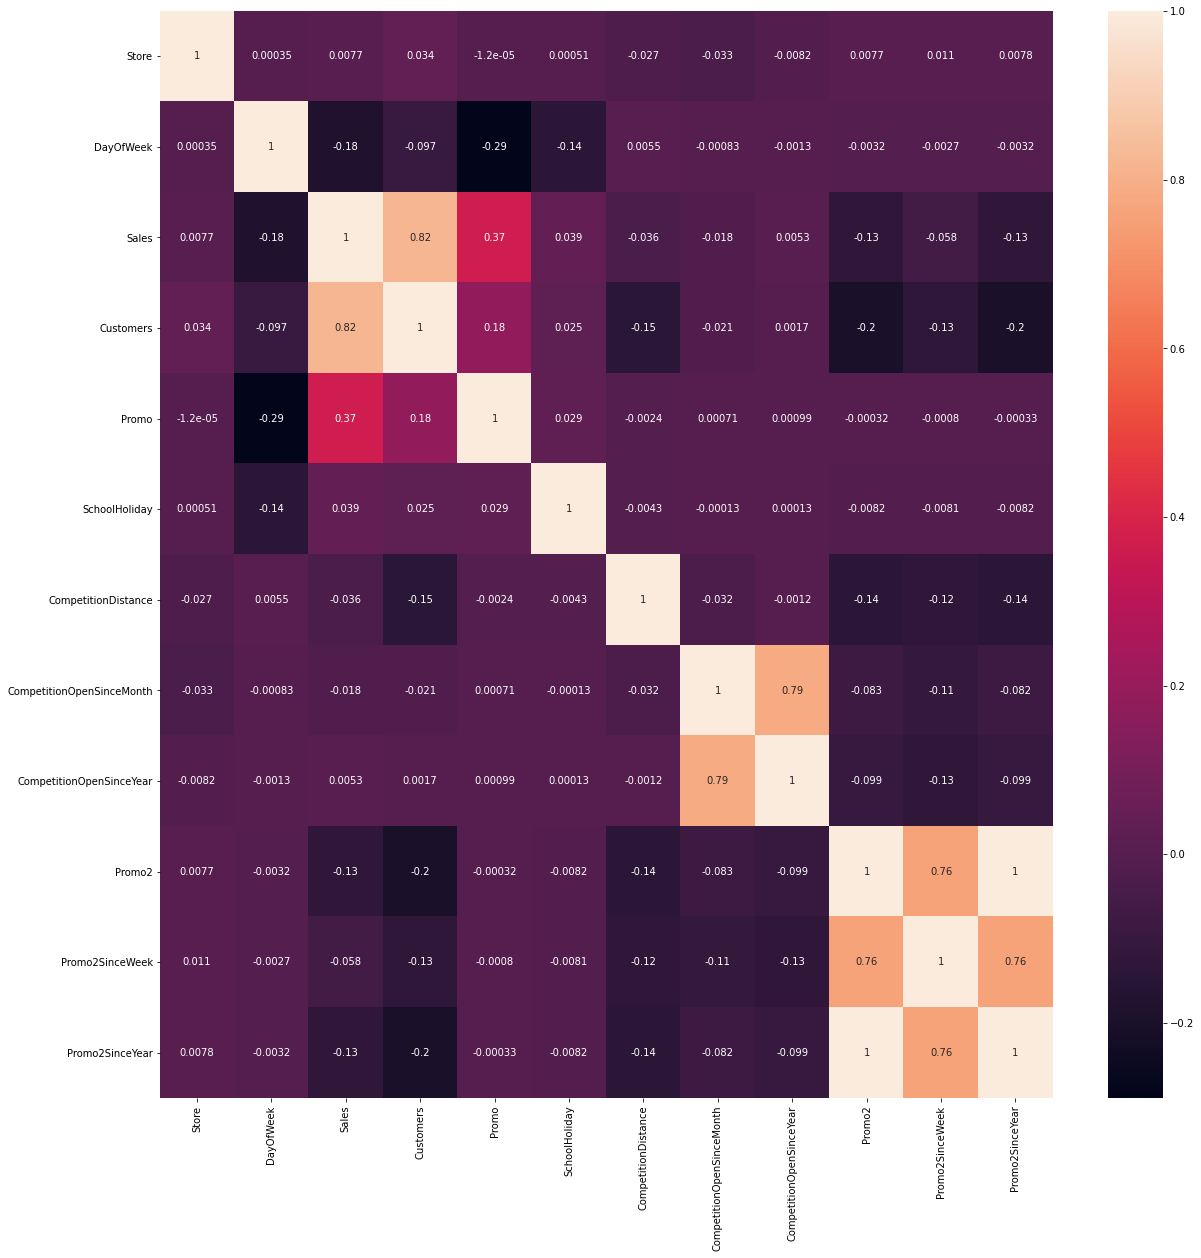

In [ ]:
correlations = sales_df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)
plt.show()

## **5.2 Seperating Date to seperate column as Year, Month and Day**

In [ ]:
sales_df['Day'] = pd.DatetimeIndex(sales_df['Date']).day
sales_df['Month'] = pd.DatetimeIndex(sales_df['Date']).month
sales_df['Year'] = pd.DatetimeIndex(sales_df['Date']).year
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,31,7,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,30,7,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,29,7,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,28,7,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,27,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0,7,1,2013
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0,5,1,2013
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0,4,1,2013
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0,3,1,2013


## **5.3 Visualising Sales and Customers by Month**

**Observations:**


*   The Sales and number of Customers start **increasing** from october and peak at the **highest** in **December**, it could be due to **Christmas**.

*   The sales are **comparitively better between** **March-June** and continue to dip until december post that.




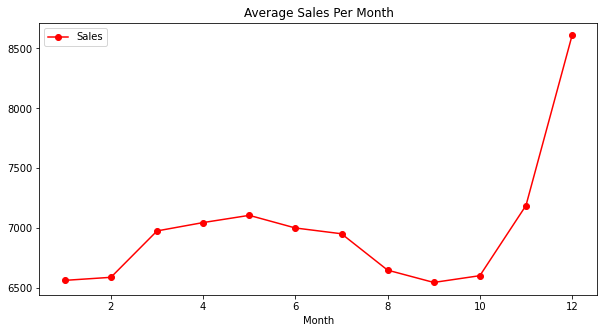

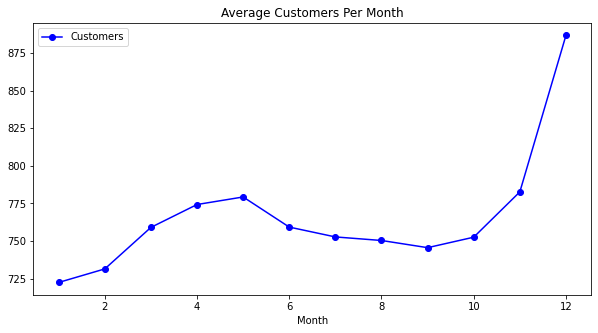

In [ ]:
axis = sales_df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5),marker='o',color='r')
axis.set_title('Average Sales Per Month')
plt.show()

#plt.figure()
axis = sales_df.groupby('Month')[['Customers']].mean().plot(figsize=(10,5),marker='o',color='b')
axis.set_title('Average Customers Per Month')

plt.show()


## **5.4 Visualising Sales and Customers by Day of Week**
**Observations:**


*   The Sales are higher on Sunday and Monday as compared to the rest of the day.

*   The number of customers visiting the store also is higher on a sunday.


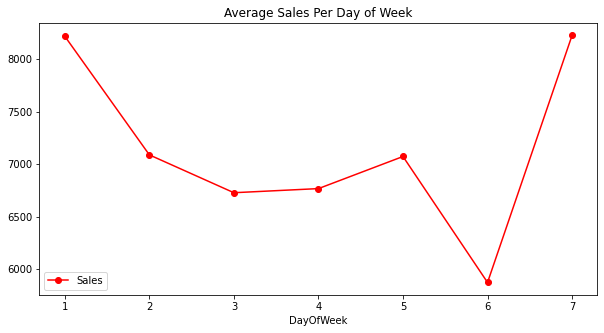

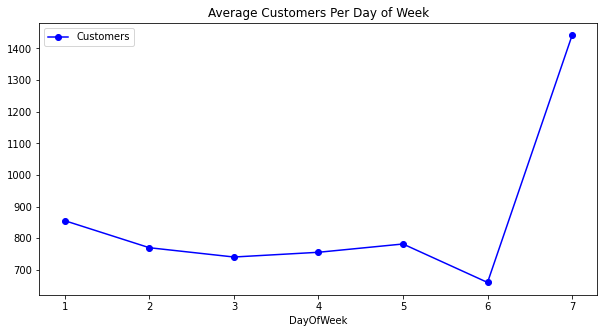

In [ ]:
axis = sales_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5),marker='o',color='r')
axis.set_title('Average Sales Per Day of Week')
plt.show()

#plt.figure()
axis = sales_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5),marker='o',color='b')
axis.set_title('Average Customers Per Day of Week')

plt.show()


## **5.5 Visualising Sales and Customers by Day**
**Observations:**


*   The Sales and Customers peak at the end and start of every month
*   It continues to drop and picks up again between 15th and 20th.



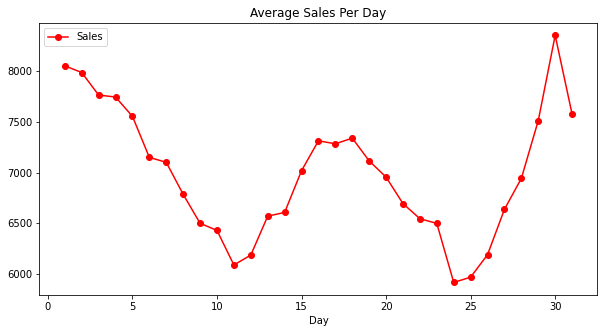

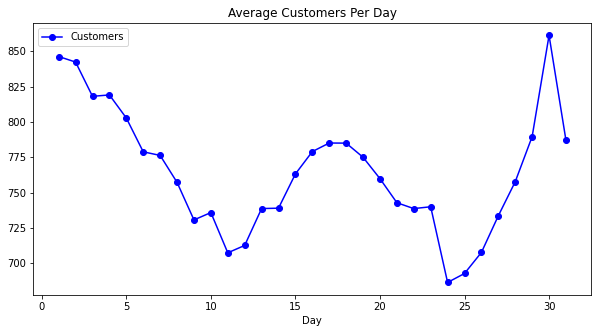

In [ ]:
axis = sales_df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5),marker='o',color='r')
axis.set_title('Average Sales Per Day')
plt.show()

#plt.figure()
axis = sales_df.groupby('Day')[['Customers']].mean().plot(figsize=(10,5),marker='o',color='b')
axis.set_title('Average Customers Per Day')

plt.show()


## **5.6 Visualising Sales by Store Type**

Store type 'b' generates an aggregate more sales than compared to the other store types.

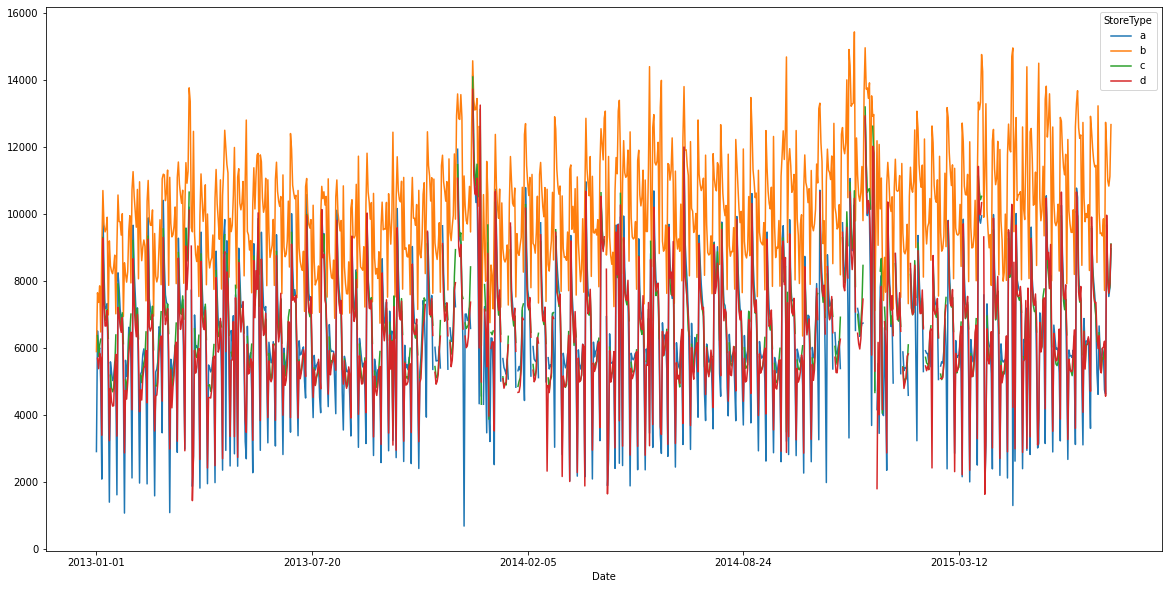

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))

sales_df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)
plt.show()

## **5.7 Visualising Effect of Promo on Sales and Customers**

**Observations:**

*   The Stores using the Promo Feature are generally having more Sales and customers visiting their store than the stores that dont have the Promo.

*   Promo 2 doesn't seem to be having a positive impact on the sales and customers, infact the stores having Promo2 Feature are having lower average sales and customers.




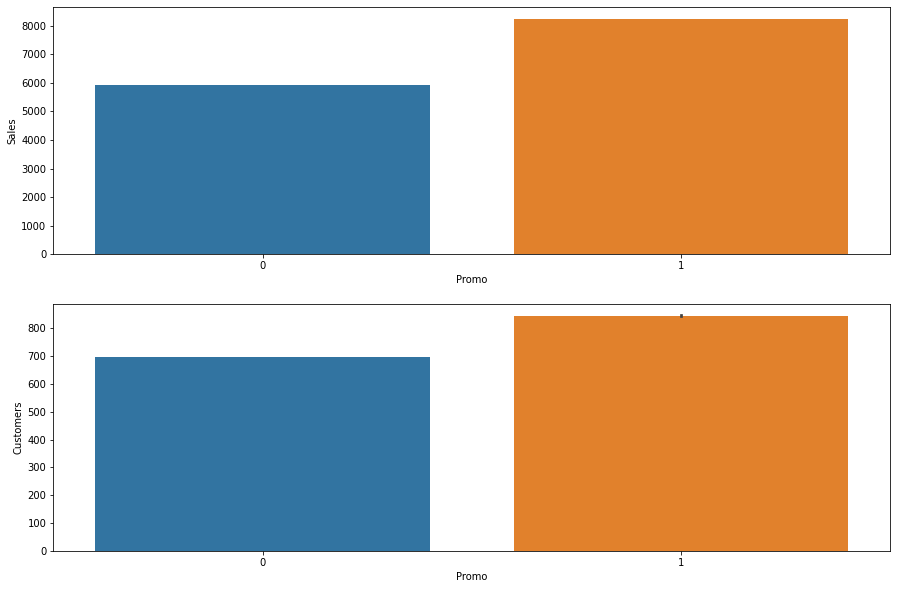

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.barplot(x='Promo', y='Sales', data=sales_df)

plt.subplot(212)
sns.barplot(x='Promo', y='Customers', data=sales_df)
plt.show()

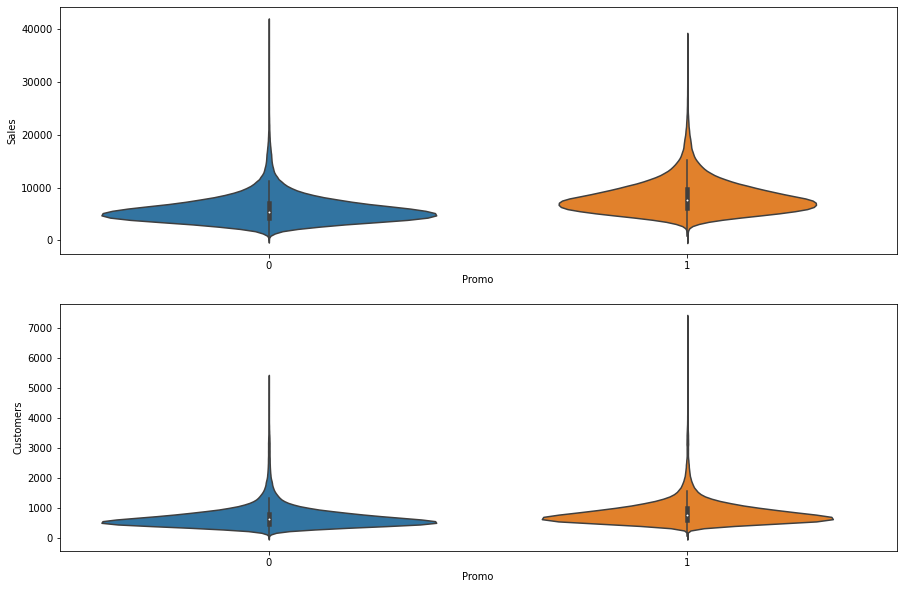

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.violinplot(x='Promo', y='Sales', data=sales_df)

plt.subplot(212)
sns.violinplot(x='Promo', y='Customers', data=sales_df)

plt.show()

# **6. Creating the Forecasting Model**

## **6.1 Facebook Prophet**

###**What is Facebook Prophet?**

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

 It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

 https://research.fb.com/blog/2017/02/prophet-forecasting-at-scale/


###**Working of Prophet**

Prophet implements an additive regression model with four elements:


*   Piecewise linear, prophet automatically picks up change points in the data and identifies any changes in the trent.


*   A Yearly seasonal component modeled using the Fourier Series.


*   A Weekly Seasonal Component.

*   A Holiday list that can be manually provided.


###**Why Facebook Prophet?**


*   **Accurate and Fast**, makes fast prediction.

*   **Automatic**, doesnt require a lot of data preprocessing, works well with missing data and outliers well.

*   **Domain Knowledge Integration**, possible to tweak forecasts by manually adding domain specific knowledge in the form of holidays list.


## **6.2 Training the Model**

In [ ]:
# importing prophet
from fbprophet import Prophet

In [ ]:
# For FB Prophet to work, we need the dates and target to be renamed as 'Ds' and 'y'

def sales_predictions(store_id, periods, sales_df=sales_df):
  '''
    Function for taking store_id and period for forecast and generating predictions
    using FB Prophet.

    params:
    -------
      store_id(int): id of the store.
      sales_df(dataframe): the dataframe for all the stores with their sales.
      periods(int): number of days for which the predictions need to be made.

    returns:
      predictions graph and weekly, monthly and yearly trend graphs
    --------

  '''
  store_sales_df = sales_df[sales_df['Store'] == store_id]
  store_sales_df = store_sales_df[['Date','Sales']].rename(columns={'Date':'ds', 'Sales':'y'})
  store_sales_df = store_sales_df.sort_values('ds')
  
  # initialize the Prophet Model
  model = Prophet()
  model.fit(store_sales_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2 = model.plot_components(forecast)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


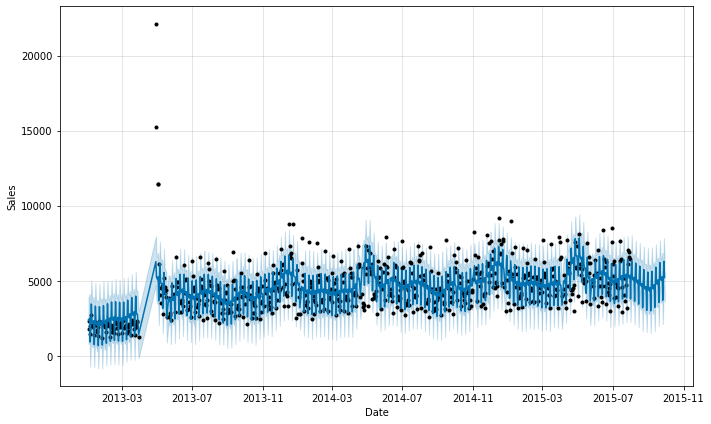

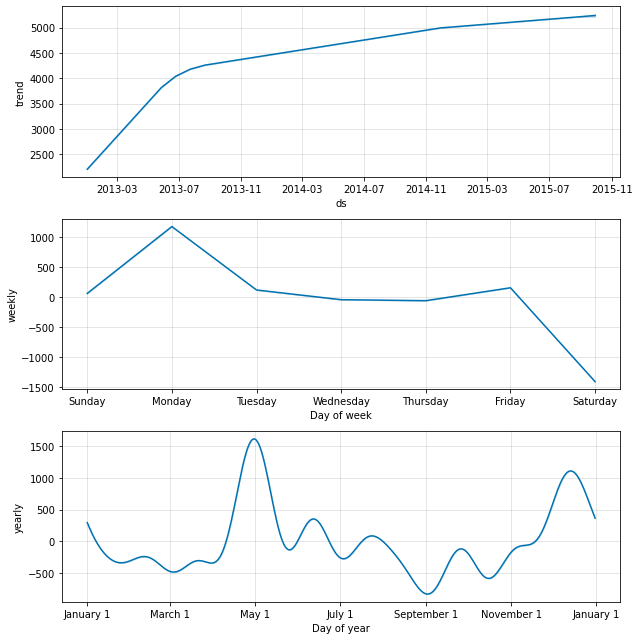

In [ ]:
store_sales_df = sales_predictions(105,60)

## **6.3 Training Model with Holidays**

In [ ]:
# Get all School Holiday Dates
school_holidays = sales_df[sales_df['SchoolHoliday']==1].loc[:,'Date'].values

# Coverting to DataFrame
school_holidays = pd.DataFrame({'ds':pd.to_datetime(school_holidays),'holiday':'School_Holiday'})


In [ ]:
# Get all State Holiday Dates
state_holidays = sales_df[(sales_df['StateHoliday']=='a') | (sales_df['StateHoliday']=='b') | (sales_df['StateHoliday']=='c')].loc[:,'Date'].values

# Converting to DataFrame
state_holidays = pd.DataFrame({'ds':pd.to_datetime(state_holidays),'holiday':'State_Holiday'})


In [ ]:
# Merging both DataFrames

holiday_list = pd.concat((state_holidays,school_holidays))
holiday_list

,ds,holiday
0,2014-10-03,State_Holiday
1,2013-10-03,State_Holiday
2,2015-06-04,State_Holiday
3,2014-06-19,State_Holiday
4,2013-05-30,State_Holiday
...,...,...
163452,2013-02-05,School_Holiday
163453,2013-02-04,School_Holiday
163454,2013-01-04,School_Holiday
163455,2013-01-03,School_Holiday


In [ ]:
# For FB Prophet to work, we need the dates and target to be renamed as 'ds' and 'y' and holiday list should have 'ds' and 'holiday'

def sales_predictions_holidays(store_id, periods, holidays, sales_df=sales_df):
  '''
    Function for taking store_id, holidays and period for forecast and generating predictions
    using FB Prophet.

    params:
    -------
      store_id(int): id of the store.
      periods(int): number of days for which the predictions need to be made.
      holidays(list): list of holiday dates.
      sales_df(dataframe): the dataframe for all the stores with their sales.
      

    returns:
      predictions graph and weekly, monthly and yearly trend graphs
    --------

  '''
  store_sales_df = sales_df[sales_df['Store'] == store_id]
  store_sales_df = store_sales_df[['Date','Sales']].rename(columns={'Date':'ds', 'Sales':'y'})
  store_sales_df = store_sales_df.sort_values('ds')
  
  # initialize the Prophet Model
  model = Prophet(holidays=holidays)
  model.fit(store_sales_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2 = model.plot_components(forecast)


### **6.3.1 Observations:**

The plots below show the **overall** trends, which seems to be **decreasing** for store 6, we can see from the **holiday** trend graph that there is **spike** in the seasonality **during july and december** months.

The **weekly** trend does suggest the initial insight we had generated from our data visualisation that the **sales increase** during **sundays** and **mondays** and slightly drop thereafter until the mid of the week.

The **Yearly** trend suggests the same insight, the sales peak during the year end, drastically **increasing** during the month of **december**.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


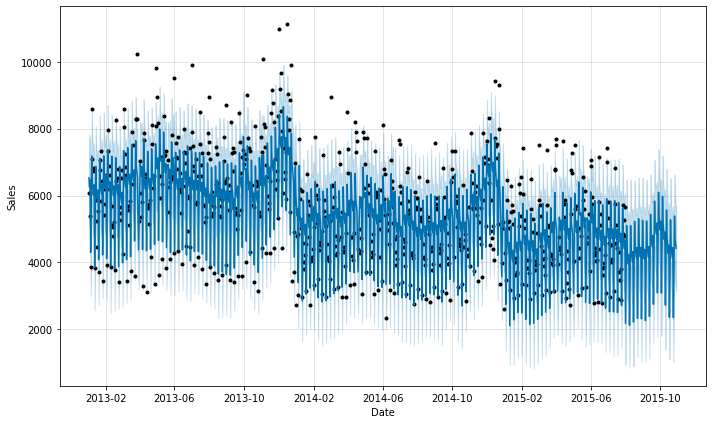

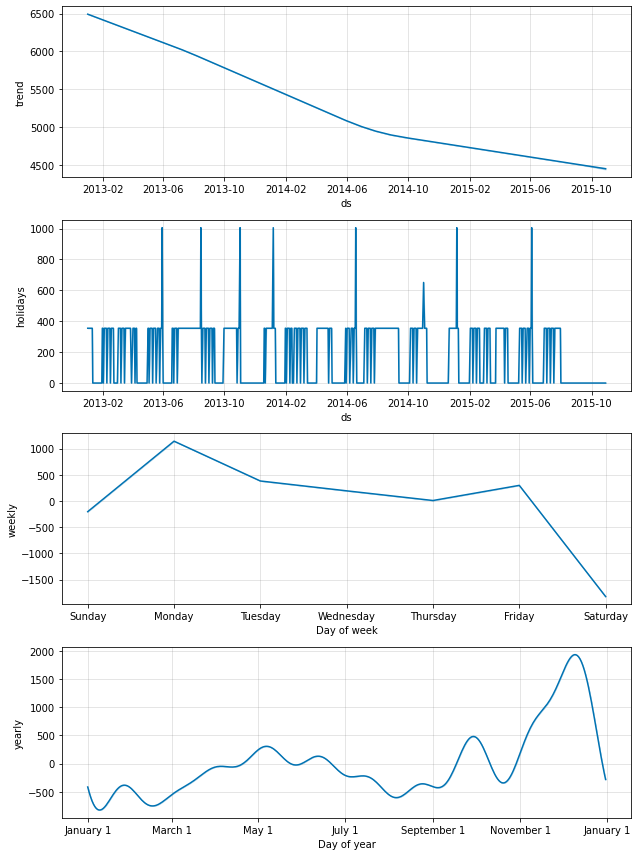

In [ ]:
sales_predictions_holidays(6, 90, holiday_list)